In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import os

from hazma.scalar_mediator import ScalarMediator
from hazma.pseudo_scalar_mediator import PseudoScalarMFV
from hazma.vector_mediator import VectorMediator
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.parameters import vh
from hazma.cmb import f_eff_ep, f_eff_g

from utilities import latex_text_width_1col

Masses to scan over

In [2]:
mx_min, mx_max, n_mxs = mpi0/2., 250., 100
mxs = np.linspace(mx_min, mx_max, n_mxs)

## Scalar mediator

In [7]:
sm_params = {"mx":1., "ms":1000., "gsxx":1.0, "gsff":s_theta, "gsGG":s_theta, "gsFF":-s_theta, "lam":vh}

In [14]:
for x, y in sm_params.items():
    print(x, y)

mx 1.0
ms 1000.0
gsxx 1.0
gsff 0.5
gsGG 0.5
gsFF -0.5
lam 246227.95


In [5]:
s_theta = 0.5
sm_hp = ScalarMediator(mx=1., ms=1000., gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta, lam=vh)

sm_f_effs = sm_hp.f_effs(mxs)

AttributeError: 'dict' object has no attribute 'iteritems'

In [4]:
# np.savetxt("data/sm_f_eff.csv",
#            np.array([mxs, sm_f_effs]).T,
#            delimiter=",",
#            header="Columns: mx (MeV), f_eff")

## Pseudoscalar mediator

In [4]:
psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1.,
                      gpup=1., gpdown=-1., gpll=0.)

psm_f_effs = psm.f_effs(mxs)

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/rambo.py:219: RuntimeWarning: invalid value encountered in sqrt
  density=density)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) ha

KeyboardInterrupt: 

Exception KeyboardInterrupt in 'hazma.positron_helper_functions.positron_charged_pion.CSpectrumPoint' ignored


KeyboardInterrupt: 

KeyboardInterrupt: 

Exception KeyboardInterrupt in 'hazma.positron_helper_functions.positron_charged_pion.__muon_spectrum' ignored
Exception KeyboardInterrupt in 'hazma.positron_helper_functions.positron_charged_pion.__muon_spectrum' ignored


KeyboardInterrupt: 

Exception KeyboardInterrupt: KeyboardInterrupt() in 'hazma.positron_helper_functions.positron_charged_pion.__muon_spectrum' ignored


KeyboardInterrupt: 

KeyboardInterrupt: 

Exception KeyboardInterrupt in 'hazma.positron_helper_functions.positron_charged_pion.__muon_spectrum' ignored
Exception KeyboardInterrupt in 'hazma.positron_helper_functions.positron_charged_pion.__muon_spectrum' ignored
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Th

KeyboardInterrupt: 

In [12]:
# np.savetxt("data/psm_f_eff.csv",
#            np.array([mxs, psm_f_effs]).T,
#            delimiter=",",
#            header="Columns: mx (MeV), f_eff")

## Vector mediator

In [5]:
vm = VectorMediator(mx=1., mv=1000., gvxx=1., gvuu=1., gvdd=0.2, gvss=0.,
                    gvee=0., gvmumu=0.)
vm_f_effs = vm.f_effs(mxs)  # plot for benchmark couplings

In [6]:
# np.savetxt("data/vm_f_eff.csv",
#            np.array([mxs, vm_f_effs]).T,
#            delimiter=",",
#            header="Columns: mx (MeV), f_eff")

### Try different coupling ratios

In [ ]:
# Coupling ratios
ratios = np.array([-2, -1., 0., 0.25, 0.5, 0.75, 1.])

# Set up the colormap
cmap = cm.viridis_r
norm = Normalize(vmin=ratios[0], vmax=ratios[-1])
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(ratios)

vm_f_effs_gvdd = []

for ratio in ratios:
    vm.gvdd = ratio * vm.gvuu
    vm_f_effs_gvdd.append(vm.f_effs(mxs))

## Plot together

In [4]:
sm_mxs, sm_f_effs = np.loadtxt("data/sm_f_eff.csv", delimiter=",").T
psm_mxs, psm_f_effs = np.loadtxt("data/psm_f_eff.csv", delimiter=",").T
vm_mxs, vm_f_effs = np.loadtxt("data/vm_f_eff.csv", delimiter=",").T

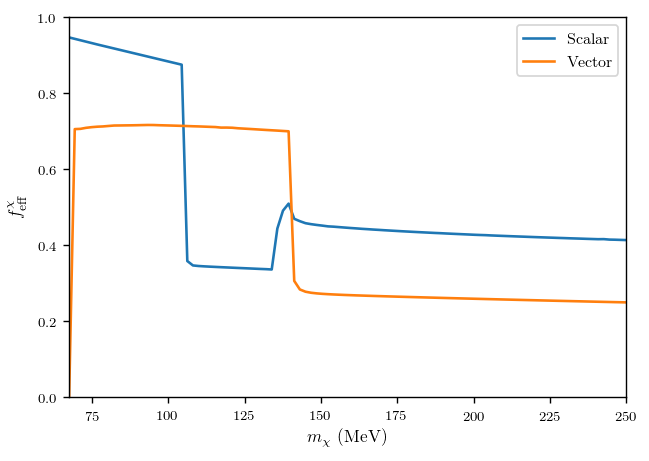

In [13]:
plt.figure(figsize=(latex_text_width_1col,
                    0.7*latex_text_width_1col))

plt.plot(mxs, sm_f_effs, label="Scalar")

plt.plot(mxs, vm_f_effs, label="Vector")
# for ratio, vm_f_eff in reversed(zip(ratios, vm_f_effs_gvdd)):
#     plt.plot(mxs, vm_f_eff, color=m.to_rgba(ratio))

plt.plot(mxs, psm_f_effs, label="Pseudoscalar")

plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.)
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}^\chi$")
plt.legend()

plt.savefig("figures/f_eff_dm.pdf")

In [8]:
os.system('say "Done computing f effective"')

0

## Electron and photon $f_{\mathrm{eff}}$s

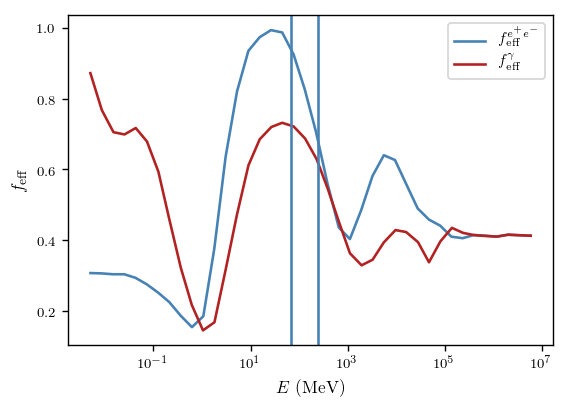

In [27]:
plt.plot(f_eff_ep.x, f_eff_ep.y, label=r"$f_{\mathrm{eff}}^{e^+ e^-}$")
plt.plot(f_eff_g.x, f_eff_g.y, label=r"$f_{\mathrm{eff}}^\gamma$")

# plt.xlim([0.005, 250])
plt.axvline(mxs[0])
plt.axvline(mxs[-1])
plt.xscale("log")
plt.xlabel(r"$E$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}$")
plt.legend()

In [8]:
from hazma.cmb import vx_cmb

In [13]:
vm.mx = 150.
e_cm = 2. * vm.mx * (1. + 0.5 * vx_cmb(vm.mx, 1e-4)**2)
spec_vm = vm.spectra(f_eff_g.x, e_cm)["total"]

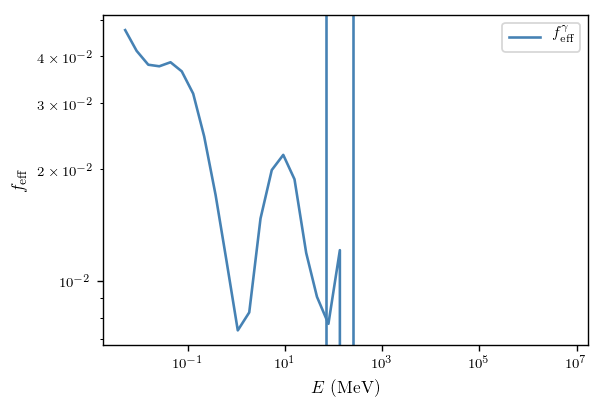

In [14]:
# plt.plot(f_eff_ep.x, f_eff_ep.x*f_eff_ep.y, label=r"$f_{\mathrm{eff}}^{e^+ e^-}$")
plt.plot(f_eff_g.x, f_eff_g.x*f_eff_g.y*spec_vm, label=r"$f_{\mathrm{eff}}^\gamma$")

# plt.xlim([0.005, 250])
plt.axvline(mxs[0])
plt.axvline(mxs[-1])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}$")
plt.legend()